### Compilo

In [1]:
!cd .. && mkdir build
!cd ../build/ && rm -rf *
!cd ../build && cmake \
  -DPYTHON_EXECUTABLE="$(which python)" \
  -DCMAKE_BUILD_TYPE=Release ..
!cd ../build && make install

mkdir: cannot create directory ‘build’: File exists
-- The C compiler identification is GNU 10.3.0
-- The CXX compiler identification is GNU 10.3.0
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
Release mode
-- Found PythonInterp: /home/andres/anaconda3/envs/tp2/bin/python (found version "3.6.5") 
-- Found PythonLibs: /home/andres/anaconda3/envs/tp2/lib/libpython3.6m.so
-- pybind11 v2.2.4
-- Performing Test HAS_FLTO
-- Performing Test HAS_FLTO - Success
-- LTO enabled
CMAKE_INSTALL_PREFIX=/home/andres/Desktop/__tp2
-- Configuring done
-- Generating done
-- Build files have been written to: /home/andres/Desktop/__tp2/build
Scanning

In [2]:
# Verifico la correcta instalación. Si no falla el import está OK
!pwd
!python --version
import metnum

/home/andres/Desktop/__tp2/notebooks
Python 3.6.5 :: Anaconda, Inc.


### Cargo los datos

In [2]:
%load_ext autoreload
%autoreload 2
import pandas as pd

df_train = pd.read_csv("../data/train.csv")

### Reduzco el dataset

In [3]:
df_train = df_train[:1000]

In [3]:
# Uso values para mandar todo a arrays de numpy
X = df_train[df_train.columns[1:]].values
y = df_train["label"].values.reshape(-1, 1)

X.shape, y.shape

((42000, 784), (42000, 1))

Supuestamente es un 7


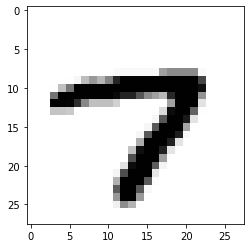

In [4]:
import matplotlib.pyplot as plt

num = 1917

print(f"Supuestamente es un {int(y[num])}")

img = X[num].reshape(28, 28)
plt.imshow(img, cmap="Greys")

### Aplico PCA

In [4]:
import time

setup_time_start_time = time.time()
pca = metnum.PCA(35)

Xt = pca.transform(X)
setup_time_end_time = time.time()
setup_time = setup_time_end_time-setup_time_start_time
print(setup_time)
print(Xt)

115.55780863761902
[[ 3.22829528 -3.4123305  -0.89433543 ... -0.95497514 -0.25973513
  -0.0336182 ]
 [-8.30233295 -1.75933239  2.44858973 ... -0.56579949  0.2826323
  -0.05096594]
 [ 4.32765323 -1.43344731 -0.32768826 ...  0.2387143  -0.57604068
  -0.08233956]
 ...
 [-1.64084903  4.63565509  0.82271998 ...  0.70941014 -0.42571124
   0.18803741]
 [-1.59756447  0.30261113 -3.40366964 ... -0.29661678  0.22902611
   0.16206994]
 [ 1.77737526  2.04401301 -0.30692336 ...  0.69552273  1.12591955
  -0.63491434]]


In [ ]:
Xt

### Verifico que las dimensiones estén bien

In [36]:
X.shape

(42000, 784)

In [5]:
Xt.shape

(42000, 35)

### Grafico las componentes principales para verificar que los autovectores estén bien calculados

#### Primer componente principal

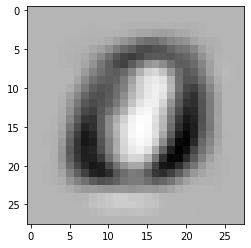

In [57]:
cp = pca.componentesPrincipales()
cp = cp.transpose()
img = cp[0].reshape(28, 28)
plt.imshow(img, cmap="Greys")

#### Segunda componente principal

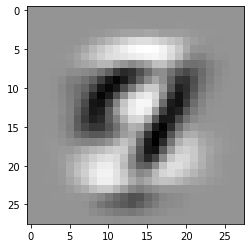

In [58]:
img = cp[1].reshape(28, 28)
plt.imshow(img, cmap="Greys")

#### Tercer componente principal

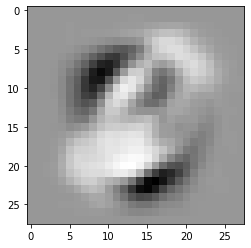

In [59]:
img = cp[2].reshape(28, 28)
plt.imshow(img, cmap="Greys")

### Aplico kNN

#### Pruebo primero con los datos sin transformar

In [27]:

X_train, y_train = X[:limit], y[:limit]
X_val, y_val = X[limit:], y[limit:]

assert len(X_train) == len(y_train)
assert len(X_val) == len(y_val)

print(f"Ahora tengo {len(X_train)} instancias de entrenamiento y {len(X_val)} de validación")

Ahora tengo 800 instancias de entrenamiento y 200 de validación


In [8]:
from sklearn.neighbors import KNeighborsClassifier

# Acá pueden cambiar el clasificador nuestro por el de sklearn!


#clf = KNeighborsClassifier(10)

clf.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [24]:
%%time
clf = metnum.KNNClassifier(10)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)

acc = accuracy_score(y_val, y_pred)
print("Accuracy: {}".format(acc))

NameError: name 'X_train' is not defined

#### Ahora uso kNN con PCA

In [6]:
limit = int(0.8 * Xt.shape[0]) 
Xt_train, y_train = Xt[:limit], y[:limit]
Xt_val,y_val = Xt[limit:],y[limit:]
print(Xt_train.shape)

clf = metnum.KNNClassifier(30000)
predict_time_start_time = time.time()
clf.fit(Xt_train, y_train)
predict_time_end_time = time.time()
predict_time = predict_time_end_time-predict_time_start_time
print(setup_time)
print(predict_time + setup_time)

(33600, 35)
115.55780863761902
116.68017148971558


In [7]:
%%time

from sklearn.metrics import accuracy_score,precision_score,recall_score
y_pred = clf.predict(Xt_val)

acc = accuracy_score(y_val, y_pred)
labels= [0,1,2,3,4,5,6,7,8,9]
precision = precision_score(y_val, y_pred,labels=labels, average=None)
print(precision)
print("Accuracy: {}".format(acc))

[0.98666667 0.12825705 0.32258065 0.09569378 0.         0.
 0.375      0.11725293 0.8        0.        ]
Accuracy: 0.1357142857142857
CPU times: user 1min 12s, sys: 386 ms, total: 1min 12s
Wall time: 1min 12s


/home/sebasbocaccio/anaconda3/envs/tp2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
